Using sklearn.datasets iris flower dataset to train ML model using logistic regression. 

Finding the accuracy of the model and using it to predict different samples in the test dataset. 

In iris dataset there are 150 samples containing following features,

1. Sepal Length
2. Sepal Width 
3. Petal Length 
4. Petal Width

Using this 4 features we can clasify a flower in one of the three categories,

1. Setosa
2. Versicolour
3. Virginica

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris_data = load_iris()

In [4]:
dir(iris_data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [9]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [16]:
import pandas as pd
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

In [17]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
iris_df['target'] = iris_data.target

In [20]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [25]:
iris_df['target_names'] = iris_df.target.map({0:'setosa', 1:'versicolor', 2:'virginica'})

In [26]:
iris_df.target_names.value_counts()

setosa        50
versicolor    50
virginica     50
Name: target_names, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_data.data,
    iris_data.target,
    test_size=0.2)


In [32]:
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Building the model

In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

Training the model

In [34]:
model.fit(X_train, y_train)

LogisticRegression()

Model accuracy

- accuracy is good - 0.93

In [35]:
model.score(X_test, y_test)

0.9333333333333333

Testing the prediction of the model on random samples:

 0 = setosa
 1 = versicolor
 2 = virginica

In [36]:
model.predict(X_test)

array([1, 0, 1, 1, 2, 2, 2, 2, 0, 1, 1, 0, 1, 1, 2, 0, 2, 2, 1, 1, 2, 1,
       2, 0, 0, 2, 1, 0, 2, 0])

In [37]:
y_test

array([1, 0, 1, 1, 1, 2, 2, 2, 0, 1, 1, 0, 1, 2, 2, 0, 2, 2, 1, 1, 2, 1,
       2, 0, 0, 2, 1, 0, 2, 0])

In [40]:
iris_data.target[78]

1

In [41]:
model.predict([iris_data.data[78]])

array([1])

In [43]:
print("iris flower from the data set is: ", iris_data.target[123])
model.predict([iris_data.data[123]])

iris flower from the data set is:  2


array([2])

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
y_pred = model.predict(X_test)

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.91      0.91      0.91        11
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



Model is apsolutly accurate for setosa, but for virginica and versicolor is making some mistakes

In [49]:
%matplotlib inline
import seaborn as sn
import matplotlib.pyplot as plt

In [48]:
con_matrix = confusion_matrix(y_test, y_pred)

Ploting the heatmap to better see, where is the model making mistakes in prediction/classification

Text(69.0, 0.5, 'Truth')

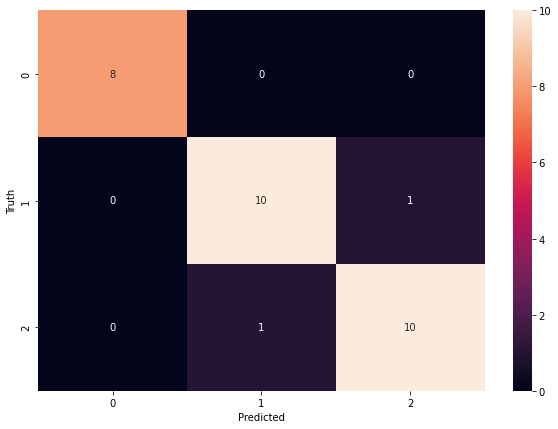

In [51]:
plt.figure(figsize = (10,7))
sn.heatmap(con_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

The model is making good classification for setosa, but in one case it classified virginica as versicolor and versicolor as virginica